<p align="center">
<img src="../image/acs_coffee_stress_co2_adequate_water_supply_2018.png" alt="ACS Publications: https://pubs.acs.org/doi/10.1021/acs.jafc.7b04537"  width="50%">

<p><h6> "Evidence is shown suggesting that warming, per se, may be less harmful to coffee suitability than previously estimated, at least under the conditions of an adequate water supply."
</p></h6>
<h6> From ACS Publications: 
<a href="https://pubs.acs.org/doi/10.1021/acs.jafc.7b04537">https://pubs.acs.org/doi/10.1021/acs.jafc.7b04537</a>
</h6>
</p>


# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [1]:
# Import necessary libraries
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations 

import seaborn as sns # for data visualization 
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as ticks # for axis formatting
import plotly.express as px # for interactive plots
import math # for mathematical operations not found in numpy or native python...

In [2]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")
# import weather data
weather = pd.read_csv("../data/weather/weather_concat.csv")

In [4]:
# TODO: Merge these two dataframes together \
weather_merged = weather.merge(coffee, how='inner', left_on='year', right_on='year')


In [ ]:
# TODO: View the first 5 rows of your data

weather_merged.head()


,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision_x,country,subdivision_y,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Minas Gerais,Arabica,16.3,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Espirito Santo,Arabica,2.2,581.0,5330.0,175.0,2298.0,2319.0,3320.0
2,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Espirito Santo,Robusta,6.2,581.0,5330.0,175.0,2298.0,2319.0,3320.0
3,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Sao Paulo,Arabica,3.3,581.0,5330.0,175.0,2298.0,2319.0,3320.0
4,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Parana,Arabica,1.8,581.0,5330.0,175.0,2298.0,2319.0,3320.0


In [20]:
# TODO: Check for null values 
weather_merged.isna().sum()


year                            0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision_x                   0
country                         0
subdivision_y                   0
type                            0
60kgs_bag                       0
nonbearing_trees                5
bearing_trees                   5
nonbear_hectares                5
bearing_hectares                5
bearing_trees_per_hectare       5
nonbearing_trees_per_hectare    5
dtype: int64

In [21]:
# TODO: Drop rows that contain null values

weather_merged.dropna(inplace=True)

([0, 1, 2, 3],
 [Text(0, 0, 'Minas Gerais'),
  Text(1, 0, 'Espirito Santo'),
  Text(2, 0, 'Sao Paulo'),
  Text(3, 0, 'Parana')])

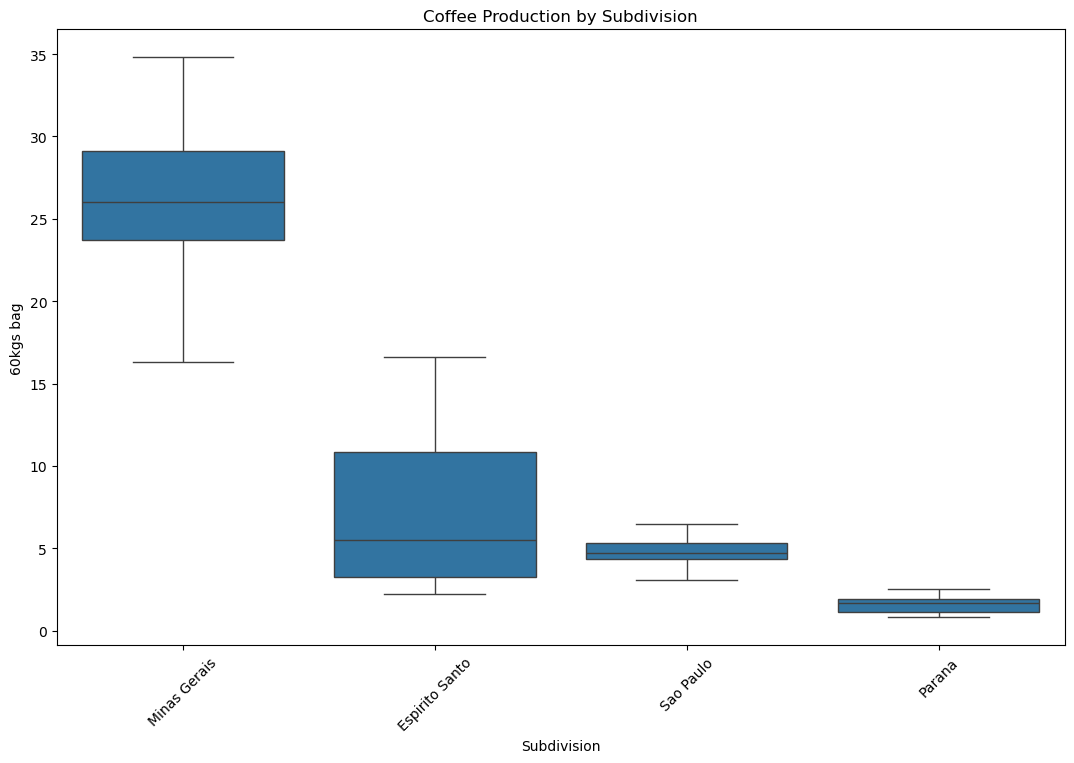

In [22]:
# TODO: BEGIN YOUR EDA!
# 60kgs bag Per Subdivision.
plt.figure(figsize=(13, 8))
sns.boxplot(data=weather_merged, x='subdivision_y', y='60kgs_bag')
plt.ylabel('60kgs bag')
plt.xlabel('Subdivision')
plt.title('Coffee Production by Subdivision')
plt.xticks(rotation=45)


### Observations and Questions gained from line plot of Maximum Temperature Over Time:

**Observations**
- A

**Questions**
- A

Additional Notes: 
- A

**Resources:**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, '2006'),
  Text(1, 0, '2007'),
  Text(2, 0, '2008'),
  Text(3, 0, '2009'),
  Text(4, 0, '2010'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014'),
  Text(9, 0, '2015'),
  Text(10, 0, '2016'),
  Text(11, 0, '2017'),
  Text(12, 0, '2019'),
  Text(13, 0, '2020'),
  Text(14, 0, '2021'),
  Text(15, 0, '2022'),
  Text(16, 0, '2023')])

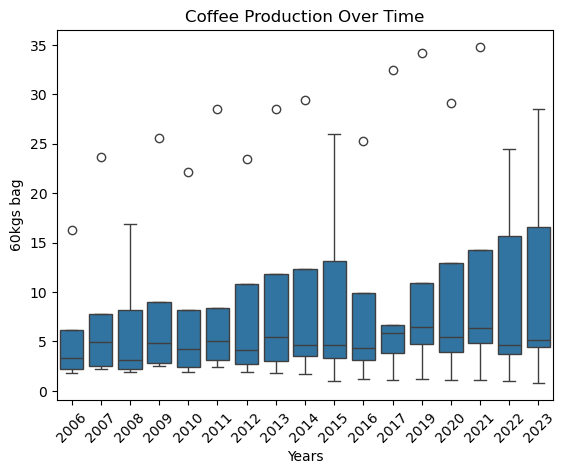

In [27]:
# TODO: BEGIN YOUR EDA!
# 60kgs bag Per Subdivision.

sns.boxplot(data=weather_merged, x='year', y='60kgs_bag')
plt.ylabel('60kgs bag')
plt.xlabel('Years')
plt.title('Coffee Production Over Time')
plt.xticks(rotation=45)


### Observations and Questions gained from line plot of Maximum Temperature Over Time:

**Observations**
- Coffee production generally increased from 2006 to 2023, with the median yield rising steadily over time.
- Early years (2006–2011) show relatively stable production with tight interquartile ranges and few outliers.
- From 2012 onward, the boxes become taller, indicating increased variability in coffee output.
- 2017 shows a noticeable dip in median coffee production, followed by strong recovery in subsequent years.
- The period between 2018 and 2023 reveals a combination of growth and increased spread, meaning while production increased, outcomes were more diverse across regions or farms.
- Frequent outliers in several years suggest exceptional harvests or reporting anomalies—e.g., values significantly higher than typical for that year.

**Questions**
- What environmental or economic factors led to the production dip in 2017?
- Why did variability increase so sharply after 2018? Could this reflect differing regional outcomes, technology adoption, or climate effects?
- Are the frequent high outliers indicative of a small group of high-yield farms, or changes in reporting and measurement?

Additional Notes: 
- The steady upward trend in medians supports the notion of growing capacity or efficiency in coffee production, possibly linked to technology, better cultivation practices, or favorable climate conditions.
- The rising variability may call for further segmentation by region, variety, or environmental conditions to better understand performance drivers.
- This analysis could benefit from being cross-referenced with climate data (e.g., rainfall, temperature) to find deeper correlations.

**Resources:**

In [33]:
# Relationship between temp_avg and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['temp_avg'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.03999214052131974
P-value: 0.7098180176622242


### Observations and Questions gained from calculating Pearson Coefficient of Average Temperature and Coffee Production:

**Observations**
- The Pearson correlation coefficient between average temperature and coffee production is approximately -0.04, indicating virtually no linear relationship.
- The p-value of 0.71 shows this correlation is not statistically significant, suggesting any observed association is likely due to random chance.
- Despite expectations that temperature might influence crop yield, this result implies that other factors may play a more significant role in affecting production.

**Questions**
- Could other weather variables like humidity, rainfall, or wind patterns have a stronger effect on production?
- Is the relationship between temperature and coffee production nonlinear or affected by thresholds (e.g., extreme heat)?
- Would analyzing subsets of the data by climate phase (e.g., El Niño vs. La Niña years) reveal stronger relationships?

Additional Notes: 
- Exploring interaction effects or lagged impacts (e.g., previous year's temperature on this year’s yield) might yield more meaningful insights.
- Consider building a multivariate regression model or visualizing the relationship to test for nonlinear trends.

**Resources:**
- weather_merged coffee production metrics.

In [34]:
# Relationship between minimum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['hum_min'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.06428185961069212
P-value: 0.5495194038620903


### Observations and Questions gained from calculating Pearson Coefficient of Minimum Humidity and Coffee Production:

**Observations**
- The Pearson correlation coefficient is approximately -0.06, indicating a very weak negative linear relationship between minimum humidity and coffee production.
- The p-value is ~0.55, which is well above the common significance threshold (0.05), meaning the result is not statistically significant.
- This suggests that minimum humidity alone does not have a meaningful linear influence on production of 60kg coffee bags.

**Questions**
- Could maximum humidity or humidity range (difference between max and min) offer more predictive power?
- Is there a nonlinear or threshold-based relationship—e.g., production drops only when humidity falls below a certain point?
- Would combining humidity with temperature and rainfall as part of a multivariate analysis yield more insight?

Additional Notes: 
- Despite intuitive expectations (e.g., that drier air harms crops), the data suggests no clear direct effect of minimum humidity on coffee yields in this dataset.
- Exploring climate event overlays (e.g., drought years, high fungal outbreak years) to detect conditional effects.

**Resources:**
- weather_merged dataset
- scipy.stats.pearsonr for linear correlation

In [36]:
# Relationship between minimum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['rain_max'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.02407033728653124
P-value: 0.822834014623461


### Observations and Questions gained from line plot of Maximum Temperature Over Time:

**Observations**
- A

**Questions**
- A

Additional Notes: 
- A

**Resources:**

In [37]:
# Relationship between minimum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['wind_max'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.1318990733926902
P-value: 0.2178989779379805


### Observations and Questions gained from line plot of Maximum Temperature Over Time:

**Observations**
- A

**Questions**
- A

Additional Notes: 
- A

**Resources:**

In [38]:
# Relationship between minimum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['hum_max'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.06010932581286241
P-value: 0.5757794738757601


### Observations and Questions gained from line plot of Maximum Temperature Over Time:

**Observations**
- A

**Questions**
- A

Additional Notes: 
- A

**Resources:**

In [39]:
# Relationship between minimum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['temp_max'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.10700479993727012
P-value: 0.3182406400491894


In [43]:
# Relationship between minimum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['temp_max'], y=weather_merged['bearing_trees'])
print(f"Pearson correlation coefficient: {r_value}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.43763795685499196
P-value: 1.7973781999300976e-05


In [42]:
weather_merged[['temp_avg', 'bearing_trees']].corr(method='pearson').style.background_gradient(cmap='coolwarm', axis=None)

,temp_avg,bearing_trees
temp_avg,1.000000,-0.427402
bearing_trees,-0.427402,1.000000


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here

What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here

What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here

What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here

Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

Answer here

Which weather factor seems to influence coffee production the most? 

Answer here

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

Answer here

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

Answer here